Gaussian Convolution Kernel for blurring images

Original Image:


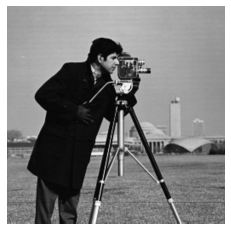

Gaussian Convolution Kernel and Result:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


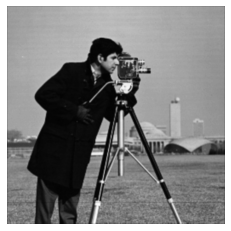

Gaussian Convolution Kernel and Result:
[[0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.02564103 0.0952381  0.15018315 0.0952381  0.02564103]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]]


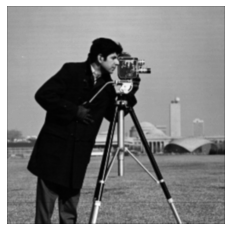

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def convolution(data,filterMatrix,pad):
    imageHeight = data.shape[0]
    imageLength = data.shape[1]
    filterSize = filterMatrix.shape[0]
    data = data.astype(np.float32)
    dataPadded = np.pad(data, ((pad,pad),(pad,pad))) # pad image

    output = np.zeros([imageHeight,imageLength])

    for col in range(imageLength):
        for row in range(imageHeight):
            window = dataPadded[row:row+filterSize, col:col+filterSize]
            output[row,col] = (window * filterMatrix).sum()

    output = np.clip(output, 0, 255)
    output = output.astype(np.uint8)
    plt.imshow(output, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

filterMatrix1 = np.array([[1,2,1],[2,4,2],[1,2,1]]) * 1/16
filterMatrix2 = np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]]) * 1/273

image1 = Image.open('filter1_img.jpg')

data1 = np.array(image1)
#print(data1.shape)
print("Original Image:")
plt.imshow(data1, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

print("Gaussian Convolution Kernel and Result:")
print(filterMatrix1)
convolution(data1,filterMatrix1,pad=1)

print("Gaussian Convolution Kernel and Result:")
print(filterMatrix2)
convolution(data1,filterMatrix2,pad=2)

Derivative of Gaussian (DoG) Convolution Kernel for edge sharpening

Original:


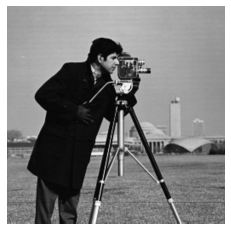

DoG x:


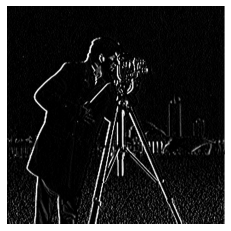

DoG y:


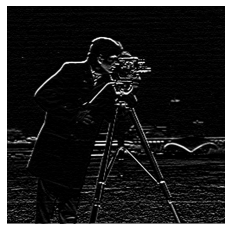

In [10]:
xdogFilter = np.array([[1,0,-1],[2,0,-2],[1,0,-1]]) # derivative of a Gaussian (DoG)
ydogFilter = xdogFilter.T

print("Original:")
plt.imshow(data1, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print("DoG x:")
convolution(data1,xdogFilter,pad=1)
print("DoG y:")
convolution(data1,ydogFilter,pad=1)

Sobel Filter for edge sharpening

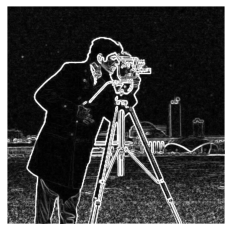

In [11]:
def sobelConvolution(data):
    pad=1
    xdogFilter = np.array([[1,0,-1],[2,0,-2],[1,0,-1]]) # derivative of a Gaussian (DoG)
    ydogFilter = xdogFilter.T
    imageHeight = data.shape[0]
    imageLength = data.shape[1]
    filterSize = xdogFilter.shape[0]
    data = data.astype(np.float32)
    dataPadded = np.pad(data, ((pad,pad),(pad,pad))) # pad image

    output = np.zeros([imageHeight,imageLength])

    for col in range(imageLength):
        for row in range(imageHeight):
            window = dataPadded[row:row+filterSize, col:col+filterSize]
            xout = (window * xdogFilter).sum()
            yout = (window * ydogFilter).sum()
            output[row,col] = np.sqrt(np.square(xout)+np.square(yout))

    output = np.clip(output, 0, 255)
    output = output.astype(np.uint8)
    plt.imshow(output, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

sobelConvolution(data1)